In [363]:
import pandas as pd
import numpy as np

file = "wallets_cleaned.csv"
df = pd.read_csv(file)
df = df.set_index('ranking')

df.head()

,address_full,balance,percentage_coins,first_in,last_in,number_ins,first_out,last_out,number_outs,owner,address,type
ranking,,,,,,,,,,,,
1,34xp4vRoCGJym3xR7yCVPFHoCNxv4Twseo Binance-co...,173306.0,0.9620%,2018-10-18 12:59:18 UTC,2019-10-26 12:23:51 UTC,283,2018-10-18 13:19:26 UTC,2019-09-12 01:50:01 UTC,188.0,Binance-coldwallet,34xp4vRoCGJym3xR7yCVPFHoCNxv4Twseo,EXCHANGE
2,35hK24tcLEWcgNA4JxpvbkNkoAcDGqQPsP 3-of-7 Huo...,151001.0,0.8382%,2019-01-25 09:43:53 UTC,2019-10-24 07:16:53 UTC,69,2019-01-25 09:58:54 UTC,2019-10-24 07:16:53 UTC,9.0,Huobi-coldwallet,35hK24tcLEWcgNA4JxpvbkNkoAcDGqQPsP,EXCHANGE
3,385cR5DM96n1HvBDMzLHPYcw89fZAXULJP Bittrex-co...,117305.0,0.6512%,2018-12-21 01:16:25 UTC,2019-10-17 21:34:42 UTC,67,2019-01-09 22:58:55 UTC,2019-10-17 21:34:42 UTC,42.0,Bittrex-coldwallet,385cR5DM96n1HvBDMzLHPYcw89fZAXULJP,EXCHANGE
4,3CgKHXR17eh2xCj2RGnHJHTDjPpqaNDgyT 2-of-3,111858.0,0.6209%,2019-09-17 12:22:36 UTC,2019-10-15 07:00:10 UTC,4,2019-09-18 17:28:23 UTC,2019-09-18 17:28:23 UTC,1.0,unknown,3CgKHXR17eh2xCj2RGnHJHTDjPpqaNDgyT,WHALE
5,37XuVSEpWW4trkfmvWzegTHQt7BdktSKUs,94506.0,0.5246%,2019-09-06 03:30:05 UTC,2019-10-16 16:30:42 UTC,42,NaN,NaN,NaN,unknown,37XuVSEpWW4trkfmvWzegTHQt7BdktSKUs,WHALE


In [2]:
np.mean(df["number_ins"])

977.9465

In [3]:
df.describe()

,balance,number_ins,number_outs
count,10000.000000,1.000000e+04,2.282000e+03
mean,1034.455297,9.779465e+02,3.408133e+03
std,4087.687573,3.478835e+04,5.280759e+04
min,159.740000,1.000000e+00,1.000000e+00
25%,219.000000,2.000000e+00,2.000000e+00
50%,356.015000,4.000000e+00,1.000000e+01
75%,829.392500,8.000000e+00,8.775000e+01
max,173306.000000,3.089605e+06,2.104419e+06


In [315]:
df = df[df['balance'] < 5000]
df = df[df['number_ins'] < 50000]
df = df[df['number_outs'] < 50000]



df_unknown = df[(df['owner'] == 'unknown')]
df_known = df[(df['owner'] != 'unknown')]

"\ndf_known.describe()\nplt.plot(df_unknown['balance'])\nplt.show()"

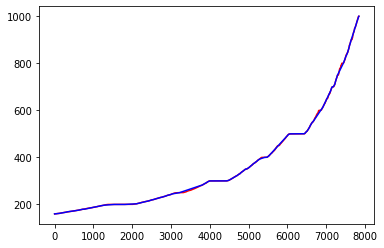

In [309]:
df_known.describe()

tmp1 = df_unknown[df_unknown['balance'] < 1000]
tmp2 = df_known[df_known['balance'] < 1000]
plt.plot(tmp1['balance'], 'r')
plt.plot(tmp2['balance'], 'b')

#plt.plot(df_unknown['balance'] < 10000, 'r')
#plt.plot(df_known['balance'] < 10000, 'b')

#plt.show()
"""
df_known.describe()
plt.plot(df_unknown['balance'])
plt.show()"""

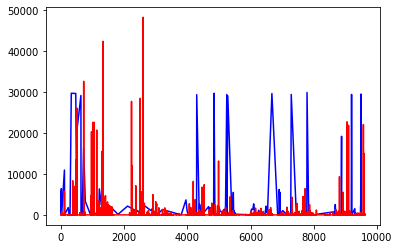

In [312]:
df_known.describe()
plt.plot(df_known['number_ins'], 'b')
plt.plot(df_unknown['number_ins'], 'r')
plt.show()

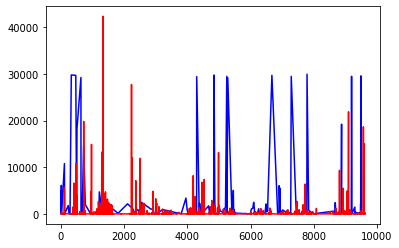

In [316]:
df_known.describe()
plt.plot(df_known['number_outs'], 'b')
plt.plot(df_unknown['number_outs'], 'r')
plt.show()

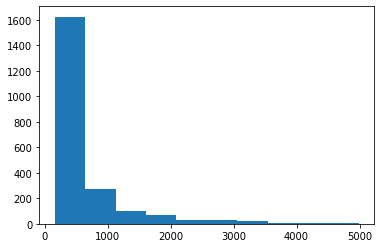

In [317]:
import matplotlib.pyplot as plt

plt.hist(df['balance'])
plt.show()



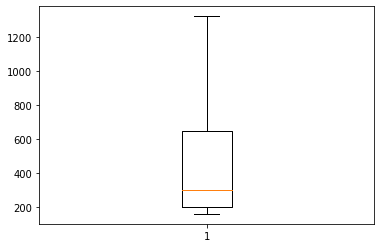

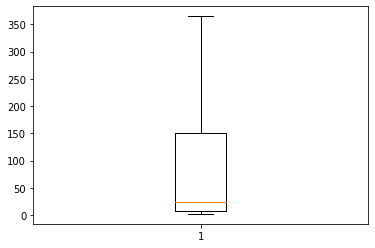

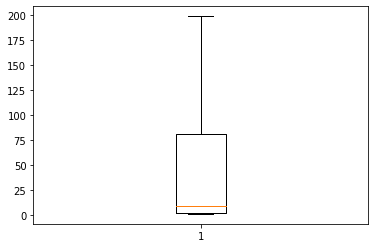

In [319]:
plt.boxplot(df['balance'], showfliers=False)
plt.show()

plt.boxplot(df['number_ins'], showfliers=False)
plt.show()

plt.boxplot(df['number_outs'].dropna(), showfliers=False)
plt.show()


traders having more outs than  100000
number of traders having more outs than  100000 :  0


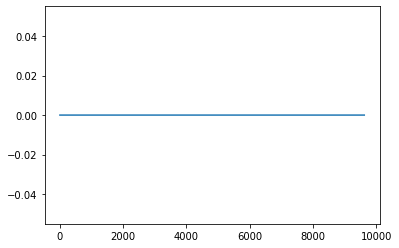

known owners having more outs than  100000
numbers of known owners having mor eouts than  100000 :  0


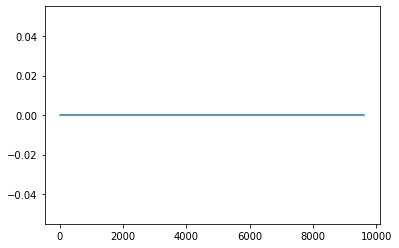

unknown owners having more outs than  100000
numbers of unknown owners having mor eouts than  100000 :  0


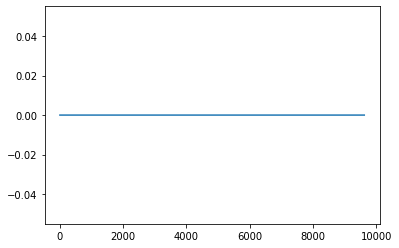

number of exchanges:  528
number of whales:  32
number of big fish:  1611


In [321]:
thres = 100000
print('traders having more outs than ',thres)
print('number of traders having more outs than ', thres,': ', sum(df['number_outs'] > thres))
plt.plot(df['number_outs'] > thres) #mehr als thres ausgangszahlungen
plt.show()

print('known owners having more outs than ', thres)
print('numbers of known owners having mor eouts than ', thres,': ', sum(df_known['number_outs'] > thres))
plt.plot(df_known['number_outs'] > thres)
plt.show()

print('unknown owners having more outs than ', thres)
print('numbers of unknown owners having mor eouts than ', thres,': ', sum(df_unknown['number_outs'] > thres))
plt.plot(df_unknown['number_outs'] > thres)
plt.show()

print('number of exchanges: ',sum(df['type']=='EXCHANGE'))
print('number of whales: ',sum(df['type']=='WHALE'))
print('number of big fish: ',sum(df['type']=='BIG_FISH'))

Int64Index([34, 37, 32, 37, 37, 35,  7, 29, 12, 39,
            ...
            33, 33, 38, 33, 39, 33, 28, 28, 30,  5],
           dtype='int64', length=10000)


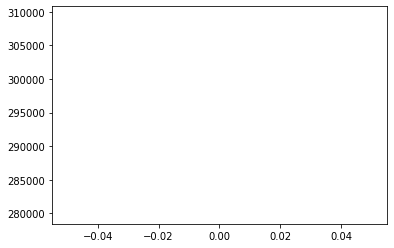

In [389]:
dates = []
for x in df['first_in']:
    #print(str.split(x))
    dates.append(str.split(x)[0])
    
#plt.plot(dates)  
dates = pd.to_datetime(dates)


period = (dates.year-2010) * 4 + (dates.month % 4)
print(period)


df['period'] = period
df_sorted = df.sort_values(by=['period'])
plt.plot(df_sorted['period'])

#tmp = df.groupby(pd.PeriodIndex(dates, freq='Q'))



#quartal aggregieren
#plot first in / last in 
#plt first out / last out

#sort walles by date

In [369]:
#tmp = df.groupby(pd.PeriodIndex(df.balance, freq='Q'))
#df.groupby(pd.Grouper(freq='M'))
dates = pd.to_datetime(df['first_in'].iloc(str.split(df['first_in'])))
#df.groupby(by=[first_in.month])

TypeError: descriptor 'split' requires a 'str' object but received a 'Series'

In [118]:
new = df['number_outs'] > 500000
df[new]

,address_full,balance,percentage_coins,first_in,last_in,number_ins,first_out,last_out,number_outs,owner,address,type
ranking,,,,,,,,,,,,
2506,1HckjUpRGcrrRAtFaaCAUaGjsPx9oYmLaZ Huobi-wallet,824.62,0.0045775826770225%,2017-10-28 11:35:54 UTC,2019-10-26 14:27:13 UTC,3089605,2017-10-29 03:09:59 UTC,2019-10-26 14:27:13 UTC,2104419.0,Huobi-wallet,1HckjUpRGcrrRAtFaaCAUaGjsPx9oYmLaZ,EXCHANGE
2953,17kb7c9ndg7ioSuzMWEHWECdEVUegNkcGc 52742716,657.95,0.0036523495069502%,2017-10-17 00:41:07 UTC,2019-10-26 14:27:13 UTC,581424,2017-10-17 00:41:07 UTC,2019-10-26 14:27:13 UTC,528276.0,unknown,17kb7c9ndg7ioSuzMWEHWECdEVUegNkcGc,EXCHANGE
6257,1G47mSr3oANXMafVrR8UC4pzV7FEAzo3r9,278.27,0.0015447263961717%,2018-04-21 22:42:40 UTC,2019-10-26 14:27:13 UTC,899120,2018-04-21 23:11:22 UTC,2019-10-26 14:08:59 UTC,898696.0,unknown,1G47mSr3oANXMafVrR8UC4pzV7FEAzo3r9,EXCHANGE


<class 'list'>
0.6626609982516225


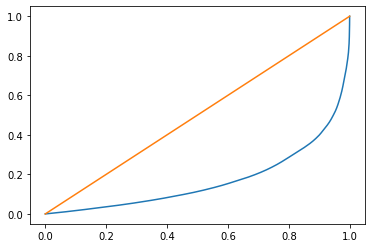

In [237]:
import numpy as np
import matplotlib.pyplot as plt

# ensure your arr is sorted from lowest to highest values first!


def gini(arr):
    count = len(arr) ##
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = sum(arr)
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = np.cumsum(arr) / sum(arr)
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

arr= list(np.sort(df['balance']))
print(type(arr))

# show the gini index!
print(gini(arr))

lorenz_curve = lorenz(arr)

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1])
plt.show()

In [ ]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)